# Code to calculate distance from one country (its capital) to another

In [45]:
#!pip install pandas geopy

In [46]:
import csv
from geopy.distance import great_circle
import pandas as pd
import numpy as np
import geopandas as gpd

In [47]:
countries_df = pd.read_csv(r"..\data\FAOSTAT\clean_data\food_trading\country_to_continent.csv") #initial csv done with ChatGPT

def calculate_distances():
    distance_data = []

    for index_from, continent_from in countries_df.iterrows():
        from_coords = (continent_from["Latitude"], continent_from["Longitude"])

        for index_to, Continent_to in countries_df.iterrows():
            #if continent_from["Continent"] != Continent_to["Continent"]:
            to_coords = (Continent_to["Latitude"], Continent_to["Longitude"])
            distance = great_circle(from_coords, to_coords).kilometers
            distance_data.append({
                "country_from": continent_from["Country"],
                "continent_from": continent_from["Continent"],
                "country_to": Continent_to["Country"],
                "Continent_to": Continent_to["Continent"],
                "distance_in_km": distance
            })

    return pd.DataFrame(distance_data)

In [48]:
# Generate the dataframe with all combinations of distances
distance_df = calculate_distances()

In [49]:
def get_categorical(df):
  """
  Identifies categorical columns in a DataFrame

  Args:
      df (pandas.DataFrame): The DataFrame to identify categorical columns in

  Returns:
      list: A list containing the names of categorical columns
  """
  l_cat = []
  for col in df.columns:
    if df[col].dtype.kind == 'O':  # Check for object dtype (categorical)
      l_cat.append(col)
  return l_cat

In [50]:
for col in distance_df.columns:
        if col in get_categorical(distance_df):
            distance_df[col] = distance_df[col].astype(str).str.lower()

In [51]:
len(distance_df)

50625

In [52]:
# Add column to determine if countries share continent or borders

distance_df["same_continent"] = np.where(distance_df["continent_from"] == distance_df["Continent_to"], 1, 0)

In [53]:
distance_df

,country_from,continent_from,country_to,Continent_to,distance_in_km,same_continent
0,afghanistan,asia,afghanistan,asia,0.000000,1
1,afghanistan,asia,albania,europe,4335.926901,0
2,afghanistan,asia,algeria,africa,5855.362822,0
3,afghanistan,asia,andorra,europe,5796.993207,0
4,afghanistan,asia,angola,africa,7596.963990,0
...,...,...,...,...,...,...
50620,yugoslavia,europe,taiwan,asia,8890.158133,0
50621,yugoslavia,europe,ussr,europe,1712.894461,1
50622,yugoslavia,europe,venezuela,south america,8982.127167,0
50623,yugoslavia,europe,wake island,oceania,12104.346148,0


# Code to determine if countries shared borders

In [54]:
# Load GeoPandas world dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\UX433F\AppData\Local\Temp\ipykernel_13000\4058156283.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [55]:
# Save GeoPandas countries to csv
world = world.rename(columns={'name': 'country'})
world['continent'] = world['continent'].astype(str).str.lower()
world['country'] = world['country'].astype(str).str.lower()

world[['continent', 'country']].to_csv(r'..\data\FAOSTAT\clean_data\geopandas_countries.csv', index=False)

In [56]:
world.head()

,pop_est,continent,country,iso_a3,gdp_md_est,geometry
0,889953.0,oceania,fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,africa,tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,africa,w. sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,north america,canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,north america,united states of america,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


## Testing

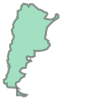

In [57]:
country1 = 'argentina'
country2 = 'bolivia'

geom1 = world[world['country'] == country1].geometry.values[0]
geom1

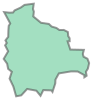

In [58]:
geom2 = world[world['country'] == country2].geometry.values[0]
geom2

In [59]:
geom1.touches(geom2)

True

In [60]:
# Load the world dataset and prepare the DataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={'name': 'country'})
world['country'] = world['country'].astype(str).str.lower()

def shares_border(country1, country2):
    """
    NEEDS GEOPANDAS

    Check if two countries share a border.

    Parameters:
    - country1 (str): The first country to check for shared borders.
    - country2 (str): The second country to check for shared borders.

    Returns:
    - int or float: Returns 1 if the two countries share a border, 0 if they do not,
      and NaN if either country is not found.
    """
    
    # Ensure the countries are lowercase for consistency
    country1 = country1.lower()
    country2 = country2.lower()
      
    # Check if both countries exist in the DataFrame
    if country1 == country2:
        return 1
    elif country1 not in world['country'].values or country2 not in world['country'].values:
        return np.nan
    
    geom1 = world[world['country'] == country1].geometry.values[0]
    geom2 = world[world['country'] == country2].geometry.values[0]
    
    return 1 if geom1.touches(geom2) else 0

C:\Users\UX433F\AppData\Local\Temp\ipykernel_13000\3855674814.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [61]:
shares_border('argentina', 'chile')

1

## Apply to dataframe

In [62]:
distance_df['share_border'] = distance_df.apply(lambda row: shares_border(row['country_from'], row['country_to']), axis=1)


In [63]:
distance_df.to_csv(r"..\data\FAOSTAT\clean_data\food_trading\country_matrix_v1.csv", index=False)